In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("decision_tree_dataset_1.csv")

In [4]:
df

,Age,Salary,Experience,Education_Level,Purchased
0,56,25287,17,1,No
1,46,54387,39,2,Yes
2,32,28512,20,1,No
3,60,21342,14,0,No
4,25,83076,32,0,Yes
...,...,...,...,...,...
995,22,37778,1,0,No
996,40,65241,8,2,Yes
997,27,62229,20,2,Yes
998,61,106652,23,2,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Salary           1000 non-null   int64 
 2   Experience       1000 non-null   int64 
 3   Education_Level  1000 non-null   int64 
 4   Purchased        1000 non-null   object
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
# Split Features & Target

X = df.drop("Purchased", axis=1)
y = df["Purchased"]


In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [ ]:
# Train Decision Tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
# Predictions

y_pred = model.predict(X_test)


In [ ]:
# Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
[[ 99   0]
 [  0 151]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00        99
         Yes       1.00      1.00      1.00       151

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [ ]:
# Feature Importance

import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
1,Salary,0.492221
2,Experience,0.278257
3,Education_Level,0.229522
0,Age,0.000000


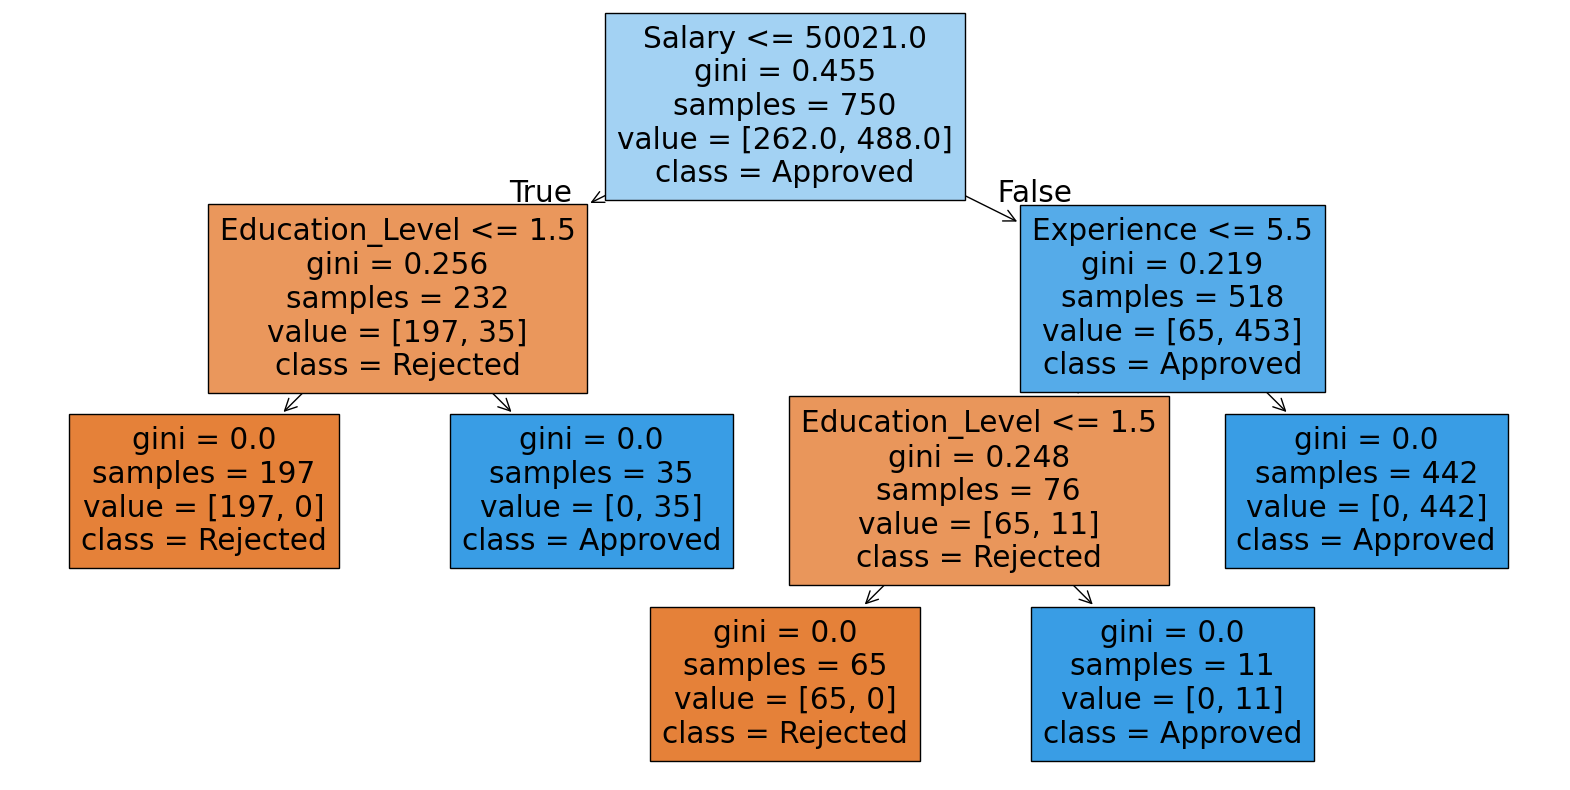

In [ ]:
# Visualize Tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["Rejected","Approved"], filled=True)
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth": [3,5,7,10],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,3,5]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

grid.best_params_


{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}